# DI 725: Transformers and Attention-Based Deep Networks

## An Assignment for Implementing Transformers in PyTorch

The purpose of this notebook is to guide you through the usage of sample code.

This notebook follows the baseline prepared by Andrej Karpathy, with a custom dataset (Don-Quixote by Cervantes). This version of the code, called [nanoGPT](https://github.com/karpathy/nanoGPT), is a revisit to his famous [minGPT](https://github.com/karpathy/minGPT).
### Author:
* Ümit Mert Çağlar

In [1]:
!git clone https://github.com/caglarmert/DI725.git

Cloning into 'DI725'...
remote: Enumerating objects: 274, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 274 (delta 73), reused 86 (delta 34), pack-reused 101 (from 1)
Receiving objects: 100% (274/274), 4.43 MiB | 9.43 MiB/s, done.
Resolving deltas: 100% (107/107), done.


In [2]:
%cd /content/DI725/assignment_1

/content/DI725/assignment_1


## Requirements
Install requirements for your environment, comment out for later uses.

Dependencies:

- [pytorch](https://pytorch.org)
- [numpy](https://numpy.org/install/)
-  `transformers` for huggingface transformers (to load GPT-2 checkpoints)
-  `datasets` for huggingface datasets (to download + preprocess datasets)
-  `tiktoken` for OpenAI's fast BPE code
-  `wandb` for optional logging
-  `tqdm` for progress bars

In [3]:
!pip install torch numpy transformers datasets tiktoken wandb tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The fastest way to get started to transformers, apart from following the labs of DI725, is to use a small model and dataset. For this purpose, we will start with training a character-level GPT on the Don-Quixote by Cervantes. The code will download a single file (2MB) and apply some transformations. Examine the code [prepare.py](data/don_char/prepare.py).

In [4]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ayca-krk (ayca-krk-metu-middle-east-technical-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

## Quick Start

Use the following to prepare the don-quixote novel treated in character level:

In [5]:
!python data/don_char/prepare.py

length of dataset in characters: 2,318,550
all the unique characters: 
 !#$%&()*,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyzÁÆÑÚàáæèéëíñóùŒœ—‘’“”•™﻿
vocab size: 106
train has 2,086,695 tokens
val has 231,855 tokens


This creates a `train.bin` and `val.bin` in that data directory. Now it is time to train our own GPT. The size of the GPT model depends on the computational resources. It is advised to have a GPU for heavy works, and to train lightweight and evaluate and infer models with a CPU.

Small scale GPT with the settings provided in the [config/train_don_char.py](config/train_don_char.py) config file will be trained with the following code:


In [7]:
!python train.py config/train_don_char.py --compile=False

Overriding config with config/train_don_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-don-char'
eval_interval = 250  # keep frequent because we'll overfit
eval_iters = 200
log_interval = 50  # don't print too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = True  # override via command line if you like
wandb_project = 'don-char'
wandb_run_name = 'mini-gpt'

dataset = 'don_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256  # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3  # with baby networks can afford to go a bit higher
max_iters = 2000
lr_decay_iters = 2000  # make equal to max_iters usually
min_lr = 1e-4  # learning_rate / 10 usually
beta2 = 0.99  # make a bit bigger because number of tokens per iter is small

war

**WANDB: project name: don-char**


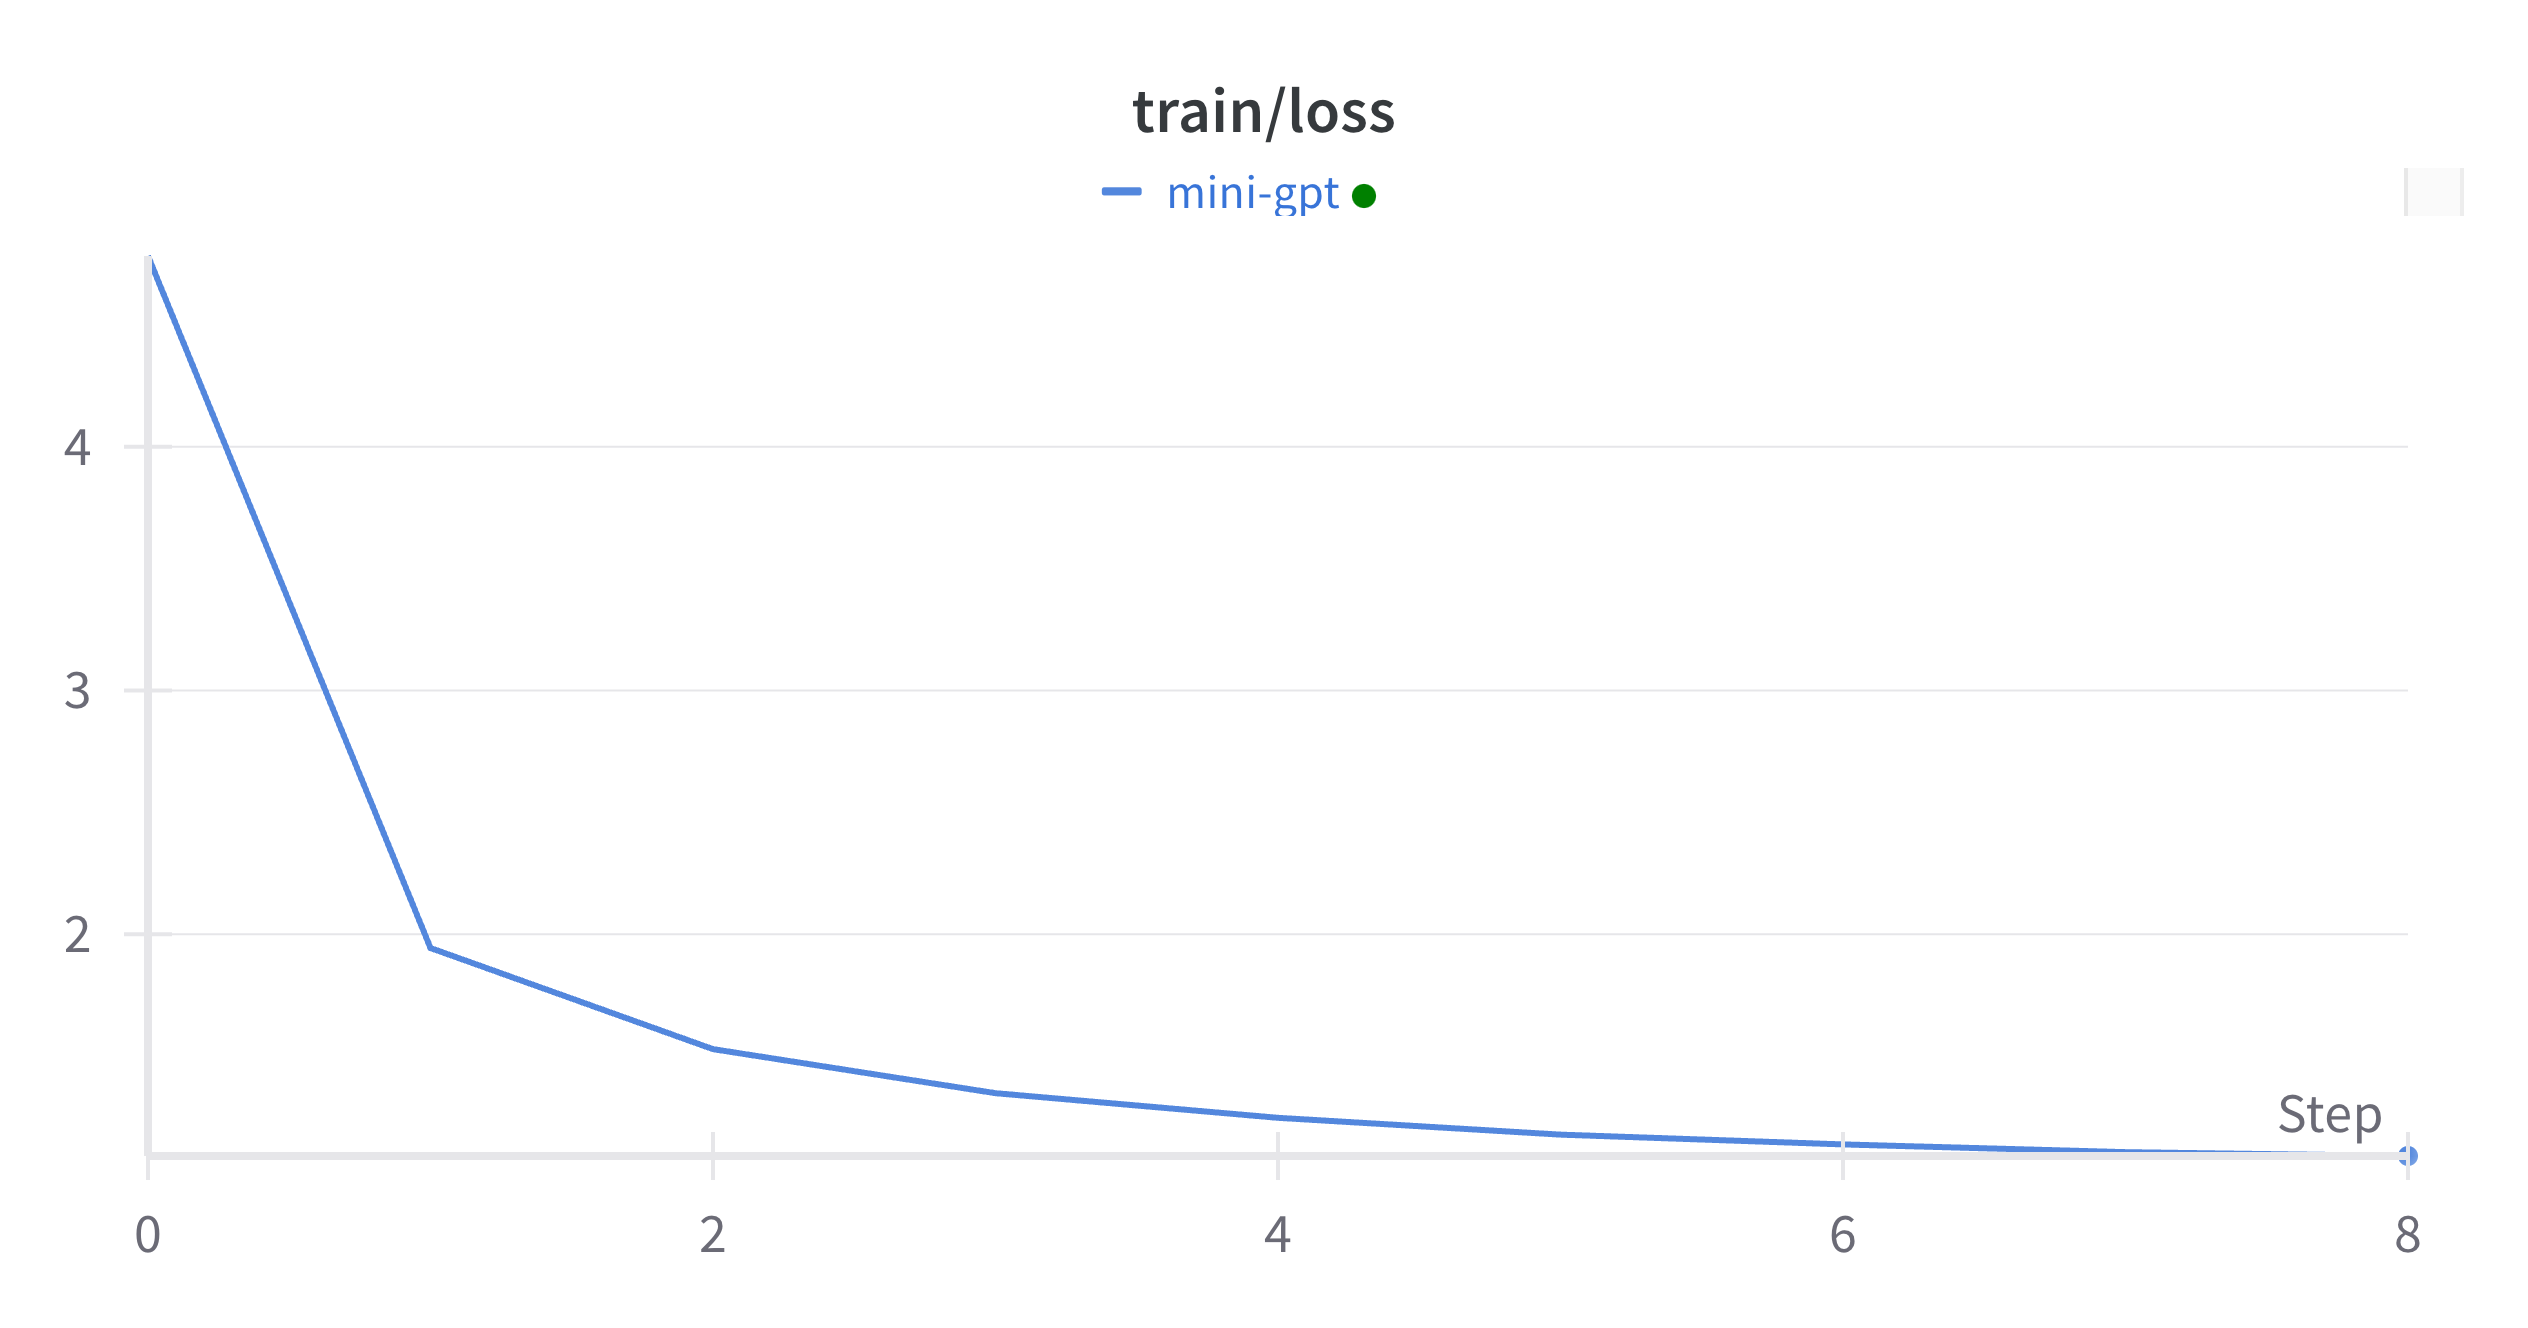

We are training a small scaled GPT with a context size of up to 256 characters, 384 feature channels, 6 layers of transformer with 6 attention heads. On one GTX 3070 GPU this training run takes about 10 minutes and the best validation loss is 1.1620. Based on the configuration, the model checkpoints are being written into the `--out_dir` directory `out-don-char`. So once the training finishes we can sample from the best model by pointing the sampling script at this directory:

In [8]:
!python sample.py --out_dir=out-don-char

Overriding: out_dir = out-don-char
number of parameters: 10.66M
Loading meta from data/don_char/meta.pkl...

let them make afterwards him at least him with their eyes, and he
had not yet feel any practical or nof hand, and they him said,
“If you don’t see what do I know were that I could say and cure the landlord
peace of the raleness company to the conscience.”

“I will not have got a form that full of the order that is to be to
less; and no more to be understanding, you mean to wonder me, I know well that
there or all these two likes you allow me all the rules you did not know what at
them.”

“I reme
---------------

“A fool of such a reason that is personed, and my thoughts to account of a
little men displayed in his about it in truth; for he is not for our
displaying of the notebook of the world.”

“It is true,” answered the landlord, “but I mean to try to obtain
your worship to see if you for coward with any other strange in a briday, the
book you will promise you is to do, at lea

This generates a few samples, for example:

```
“I grant all that,” said the governor; “it’s not in a low voice

but not yet forget that there’s none of it the poor in the world; I’ll

like to take special to have been no one to write out the stone of

patience to the village.”

```

It is pretty nice to have a GPT in a few minutes of character level training! Better results can be achieved possibly by hyperparameter tuning and finetuning (transfer learning) from a pre-trained model.


## Quick start with less resources

If we are [low on resources](https://www.youtube.com/watch?v=rcXzn6xXdIc), we can use a simpler version of the training, first we need to set compile to false, this is also a must for Windows OS for now. We also set the device to CPU. The model that is trained in 10 minutes for a starter grade GPU, will be trained in a much longer time, so we can also decrease the dimensions of our model as follows:

In [9]:
!python train.py config/train_don_char.py --device=cpu --out_dir="out-don-small-char" --compile=False --eval_iters=20 --log_interval=50 --block_size=64 --batch_size=12 --n_layer=4 --n_head=4 --n_embd=128 --max_iters=1000 --lr_decay_iters=1000 --dropout=0.0

Overriding config with config/train_don_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-don-char'
eval_interval = 250  # keep frequent because we'll overfit
eval_iters = 200
log_interval = 50  # don't print too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = True  # override via command line if you like
wandb_project = 'don-char'
wandb_run_name = 'mini-gpt'

dataset = 'don_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256  # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3  # with baby networks can afford to go a bit higher
max_iters = 2000
lr_decay_iters = 2000  # make equal to max_iters usually
min_lr = 1e-4  # learning_rate / 10 usually
beta2 = 0.99  # make a bit bigger because number of tokens per iter is small

war

**WANDB: project name: don-char (small) (red)**


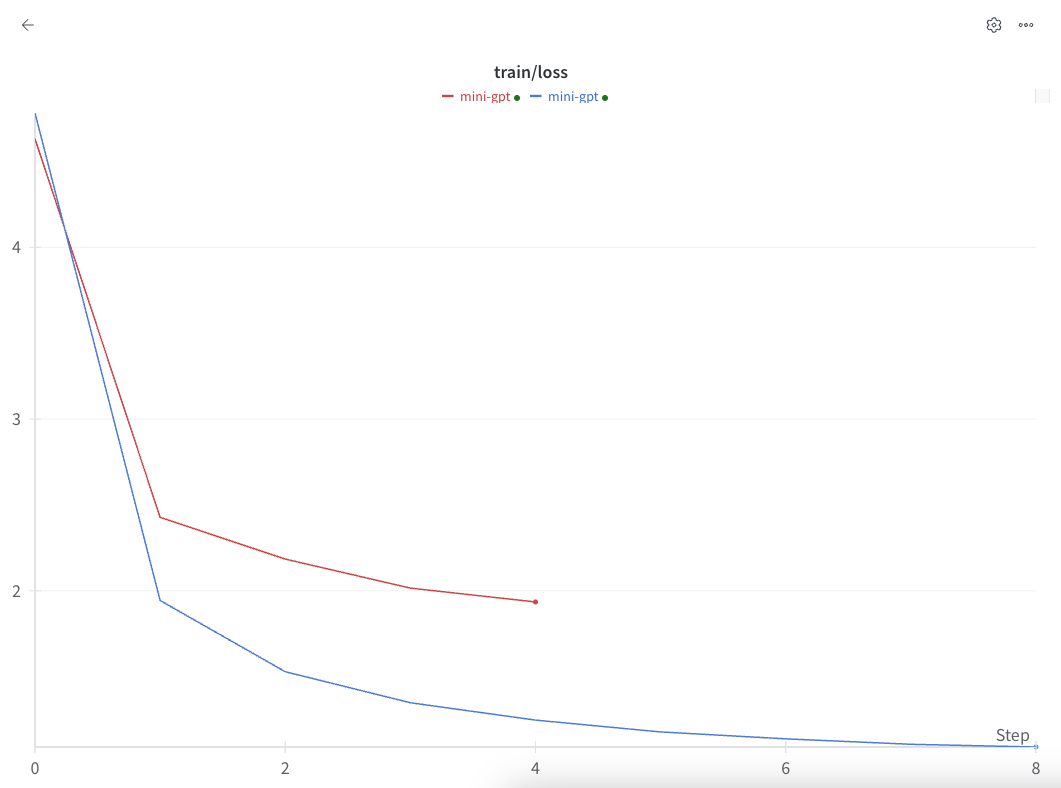

*Here, since we are running on CPU instead of GPU we must set both `--device=cpu` and also turn off PyTorch 2.0 compile with `--compile=False`. Then when we evaluate we get a bit more noisy but faster estimate (`--eval_iters=20`, down from 200), our context size is only 64 characters instead of 256, and the batch size only 12 examples per iteration, not 64. We'll also use a much smaller Transformer (4 layers, 4 heads, 128 embedding size), and decrease the number of iterations to 2000 (and correspondingly usually decay the learning rate to around max_iters with `--lr_decay_iters`). Because our network is so small we also ease down on regularization (`--dropout=0.0`). This still runs in about ~5 minutes, but gets us a loss of only 1.88 and therefore also worse samples, but it's still good fun:*

In [10]:
!python sample.py --out_dir=out-don-small-char --device=cpu

Overriding: out_dir = out-don-small-char
Overriding: device = cpu
number of parameters: 0.80M
Loading meta from data/don_char/meta.pkl...

gearted is the thise thee glot, on no pertemes for the bensed toir theems word that your
wame and the alll the thu of thirm to thak Mof I cand to the shey thou
wno alld it ther mastine dew in thaurd soe cirrves of the at the
pagresser iff by withourser that uure of the lised, ind I de Dan
Sonchonbon me dimmond to the the have hich Serrevelled that theis she
pasteion; Sancho lles and the me he that-sured and on mucke a he crooury sheimse hir,
 the for dof coup it of theurne barto primmpsent on hi
---------------

had slid the so liase see we
ill head they cartaiben, and the was the ham has but to in he has
me a
chadttepilr and on etor forthous hout Sancho Asheourved if aswirlly a the
Riest, oon in which was at is to it it Sarve der eby this O he ming and ord on mbe tore of ord they my for ess, and I caumstire of we whe ar
pomsing your she, which of t

Generates samples like this:

```
Sancho nother with this then of everantan has for five he enver any

shal were than as in though they and I knight the sther his a jlage,

and mad priled and squiel a hist to in feet she took and and sersse to her of

Marest and good was pefor rubt some by than lave from his dintat all

pack that he remants to goost ever to him arestiance of it the were to who

which mom, worly gane for he sporen gort he was roosion, and be that

it thou, so so he kniders what the and him of him dest us on shart
```

*Not bad for ~3 minutes on a CPU, for a hint of the right character gestalt. If you're willing to wait longer, feel free to tune the hyperparameters, increase the size of the network, the context length (`--block_size`), the length of training, etc.*

*Finally, on Apple Silicon Macbooks and with a recent PyTorch version make sure to add `--device=mps` (short for "Metal Performance Shaders"); PyTorch then uses the on-chip GPU that can *significantly* accelerate training (2-3X) and allow you to use larger networks. See [Issue 28](https://github.com/karpathy/nanoGPT/issues/28) for more.*



## Finetuning

Finetuning or transfer learning is a precious method of achieving better models thanks to pre-trained models. Finetuning GPT models is just as simple as training from scratch! We will now download the Don-Quixote (again) but this time we will define it with tokens (using OpenAI's BPE tokenizer) instead of characters.



In [14]:
!python data/don/prepare.py

train has 558,761 tokens
val has 62,587 tokens


Run an example finetuning like:

In [15]:
!python train.py config/finetune_don.py --compile=False

Overriding config with config/finetune_don.py:
import time

out_dir = 'out-don'
eval_interval = 5
eval_iters = 40
wandb_log = True # feel free to turn on
wandb_project = 'don'
wandb_run_name = 'ft-' + str(time.time())

dataset = 'don'
init_from = 'gpt2' # this is the GPT-2 model

# only save checkpoints if the validation loss improves
always_save_checkpoint = False

# the number of examples per iter:
batch_size = 1
gradient_accumulation_steps = 32
max_iters = 20

# finetune at constant LR
learning_rate = 3e-5
decay_lr = False

Overriding: compile = False
tokens per iteration will be: 32,768
Initializing from OpenAI GPT-2 weights: gpt2
2025-04-04 14:11:32.390491: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-04 14:11:32.408053: E external/local_xla/xla/stream_exe

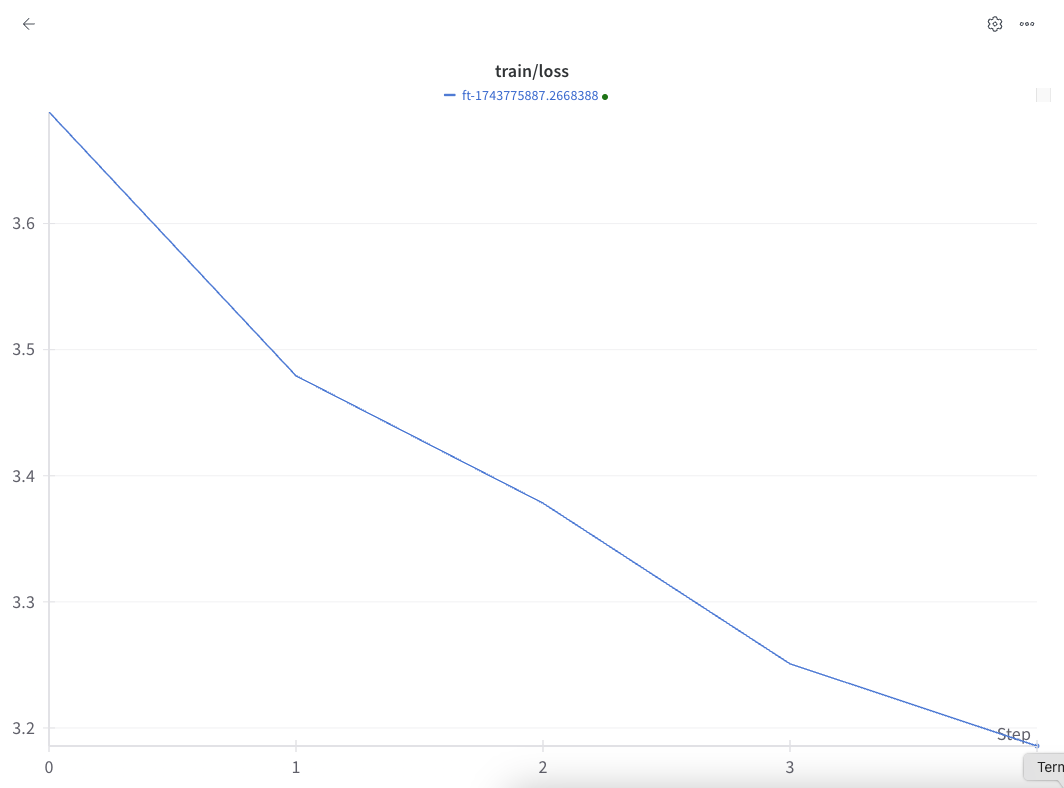

This will load the config parameter overrides in `config/finetune_don.py`. Basically, we initialize from a GPT2 checkpoint with `init_from` and train as normal, except shorter and with a small learning rate. Model architecture is changable to `{'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}`) and can be decreased in size by the `block_size` (context length). The best checkpoint (lowest validation loss) will be in the `out_dir` directory, e.g. in `out-don` by default, per the config file. You can then run the code in `sample.py --out_dir=out-don`:
```
* * All creatures that enter the world below may so far as want to observe the rules of their own land, and may obey them under the hand of their lord, and may not follow others below.

* * *

THE PORT COLLIDATES,

- * *

ON the light, and the light to the dark, and the darkness to the light, and the darkness to the darkness, were the present-day laws of monarchy, whose lordship they approved in their faces and hearts. From this moment on, however, they had no other representation to give than that of their master, who, for all that was said or heard, had reached the height of his power.

The king's hand, though at times little more than a finger of his, required no more than a finger of his, and that power was, that of holding his eye, and the other of his, in his own, body.

When this was spoken of, it was a simple and noble quibble, and the subject of this was so as to admit of the few who had any forsemination, and the few who had the most to go on.

The time did not come for a thought of this, and for a moment the very thought of it seemed to fall to the ground.

But that thought did not come to pass; though the king was not speaking of the king, it came to pass that the king, with all his might, and all his cunning, and no other sense, and without any understanding, and without any desire for the utmost of his services, and without any desire to put an end to his own glory, and without any desire to hide his triumph, had found the time to say that this was what he thought on the subject of religion; that it was what he thought, and according as it seemed to him to be as good or better to him than to the other kings, and he was in no sense a king, for it seemed to him he could never have any more power than he had to be; that it was a matter of his will and power; and that it was all a matter of his will, for he was determined that this look and that to which he might have been given to hold it was the best in himself.

And so it was that the king, who was all around him, and all around him; and so
```

# Inference and Sampling
Use the script `sample.py` to sample either from pre-trained GPT-2 models released by OpenAI, or from a model you trained yourself. For example, here is a way to sample from the largest available `gpt2-xl` model:

In [16]:
!python sample.py --out_dir=out-don --start="Explain the relationship between Don Quixote and Sancho Panza" --num_samples=5 --max_new_tokens=100

Overriding: out_dir = out-don
Overriding: start = Explain the relationship between Don Quixote and Sancho Panza
Overriding: num_samples = 5
Overriding: max_new_tokens = 100
number of parameters: 123.65M
No meta.pkl found, assuming GPT-2 encodings...
Explain the relationship between Don Quixote and Sancho Panza, and some of the films they have made.

And I want to say a few words about the sound of his voice. Who knows how many people have been waiting for him to come off screen. He certainly played out the role of a man without a doubt in the history of the human race, who has never been treated with the respect that a man deserves, and I can say with pleasure that his voice has a very good ring to it.

But I am not so certain
---------------
Explain the relationship between Don Quixote and Sancho Panza, the magician who is almost always telling stories with his hands in his pockets.

Here in the first story, Don Quixote tells Sancho Panza that this "Mortal King of the Desert" who made

If you'd like to sample from a model you trained, use the `--out_dir` to point the code appropriately. You can also prompt the model with some text from a file, e.g.:

In [17]:
!python sample.py --start=FILE:"prompt/fictional.txt" --out_dir="out-don" --num_samples=1 --max_new_tokens=100

Overriding: start = FILE:prompt/fictional.txt
Overriding: out_dir = out-don
Overriding: num_samples = 1
Overriding: max_new_tokens = 100
number of parameters: 123.65M
No meta.pkl found, assuming GPT-2 encodings...
Dain charges head on with his warhammer and full plate clad armor. Determined to topple anything in front of him.

One of the last guards in the castle, so his name was that of Tom Dain, was a bastard of a certain noble.

I'll kill the bastard and he won't be able to recover his armor.

That would be a shame to me, but I'll give him a piece of my heart, and if he can do it, I'll send him on his way.

I'm with you, the bastard.

But wait a minute,
---------------


In [18]:
!python sample.py --start=FILE:"prompt/positive_review.txt" --out_dir="out-don" --num_samples=1 --max_new_tokens=500

Overriding: start = FILE:prompt/positive_review.txt
Overriding: out_dir = out-don
Overriding: num_samples = 1
Overriding: max_new_tokens = 500
number of parameters: 123.65M
No meta.pkl found, assuming GPT-2 encodings...
This place was DELICIOUS!! My parents saw a recommendation to visit this place from Rick Sebak's \"25 Things I Like About Pittsburgh\" and he's usually pretty accurate. His recommendations were to try the Reuben, Fish Sandwich and Open-Faced Steak Sandwich. We went early afternoon for a late lunch today (a Saturday) and were seated right away. The staff is extremely friendly. My Mom & I each had the fish sandwich, while my Dad & Brother had a Reuben sandwich. The fish was very good, but the Reuben was to die for! Both dishes were massive, and could very easily be shared between two people. On top of being extremely large portions, it was incredibly affordable. The giant fish sandwich was $8 and the giant Reuben was $7.50. Our drinks were always filled and we were checke

I hope you will enjoy with the GPT as much as I did!

## Efficiency notes

*For simple model benchmarking and profiling, `bench.py` might be useful. It's identical to what happens in the meat of the training loop of `train.py`, but omits much of the other complexities.*

*Note that the code by default uses [PyTorch 2.0](https://pytorch.org/get-started/pytorch-2.0/). At the time of writing (Dec 29, 2022) this makes `torch.compile()` available in the nightly release. The improvement from the one line of code is noticeable, e.g. cutting down iteration time from ~250ms / iter to 135ms / iter. Nice work PyTorch team!*


## Troubleshooting

*Note that by default this repo uses PyTorch 2.0 (i.e. `torch.compile`). This is fairly new and experimental, and not yet available on all platforms (e.g. Windows). If you're running into related error messages try to disable this by adding `--compile=False` flag. This will slow down the code but at least it will run.*

*For some context on this repository, GPT, and language modeling it might be helpful to watch [Zero To Hero series](https://karpathy.ai/zero-to-hero.html). Specifically, the [GPT video](https://www.youtube.com/watch?v=kCc8FmEb1nY) is popular if you have some prior language modeling context.*

## Acknowledgements

This code is a fork from Andrej Karpathy's introductory [NanoGPT repository](https://github.com/karpathy/nanoGPT), which is an updated form of minGPT.

# Further Experiments

(Optional)

For further experiments, you can, for example, reproduce the GPT-2, which is still powerful, by following the link to the Andrej Karpathy's repository.

# Git

In [29]:
%cd /content/
!git clone https://github.com/aycakrk/DI725_Assignment_1.git


/content
Cloning into 'DI725_Assignment_1'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [30]:
!cp -r /content/DI725/assignment_1* /content/DI725_Assignment_1/


In [32]:
!git remote -v


origin	https://github.com/aycakrk/DI725_Assignment_1.git (fetch)
origin	https://github.com/aycakrk/DI725_Assignment_1.git (push)


In [36]:
%cd /content/DI725_Assignment_1
!git add .
!git commit -m "All files"
!git push https://x@github.com/aycakrk/DI725_Assignment_1.git



/content/DI725_Assignment_1
On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Enumerating objects: 71, done.
Counting objects: 100% (71/71), done.
Delta compression using up to 12 threads
Compressing objects: 100% (68/68), done.
Writing objects: 100% (70/70), 1.39 MiB | 1.81 MiB/s, done.
Total 70 (delta 11), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (11/11), done.
To https://github.com/aycakrk/DI725_Assignment_1.git
   aee8953..4527c4f  main -> main


In [42]:
%cd /content/DI725_Assignment_1

/content/DI725_Assignment_1


In [68]:
!rm /content/DI725_Assignment_1/assignment_1/Starter_Code.ipynb

In [46]:
!git add .
!git commit -m "Removed Starter_Code.ipynb"
!git push https://x@github.com/aycakrk/DI725_Assignment_1.git

[main 6eaffc3] Removed Starter_Code.ipynb
 1 file changed, 1225 deletions(-)
 delete mode 100644 assignment_1/Starter_Code.ipynb
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 12 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 318 bytes | 318.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/aycakrk/DI725_Assignment_1.git
   aefa360..6eaffc3  main -> main


In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
!cp /content/drive/MyDrive/Colab_Notebooks/Starter_Code.ipynb /content/DI725_Assignment_1/assignment_1/


In [94]:
%cd /content/DI725_Assignment_1/
!git add .


/content/DI725_Assignment_1


In [95]:
!git commit -m "Added completed Starter_Code.ipynb"


On branch main
Your branch is ahead of 'origin/main' by 2 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


removed token parts